# SMOTE + FE + Standardization + ML Classification Model

SMOTE &rarr; Oversampling technique (called Synthetic Minority Oversampling Technique)

# 1. Import Necessary Libraries

In [1]:
# For Computational and random seed purpose
import numpy as np
np.random.seed(42)
# To read csv file
import pandas as pd
# To Split data into train and cv data
from sklearn.model_selection import train_test_split
# To compute AUROC score
# For AUROC Score (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
from sklearn.metrics import  roc_curve, auc
# Oversampling technique: SMOTE
from imblearn.over_sampling import SMOTE
# Data is umbalance, we need Calibrated Model to ive confidence probabilities result
from sklearn.calibration import CalibratedClassifierCV
# For Hyperparameter and CV Fold
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# For plot AUROC graph
import matplotlib.pyplot as plt
# For heatmap
import seaborn as sns
# To ignore warninga
import warnings
warnings.filterwarnings('ignore')
# To stndardize the data
from sklearn.preprocessing import StandardScaler

D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

# 2. Read train data

In [2]:
# Locate parent directory
data_dir = "./"

# Read csv file and display top 5 rows
df_train = pd.read_csv(data_dir+'/train.csv')
df_train.head(5)

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [3]:
df_test = pd.read_csv(data_dir+'/test.csv')
df_test.head(5)

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


# 3. Apply Feature Engineering

In [4]:
# We already saw in 2_FE.ipynb file that we created a feat_enng function. We just put it here

def feature_engg(df, if_test = False):
    '''
    Perform Feature Engg in Basic Stats, Trigometrics, Hyperbolic and Exponential Function
    
    Parameters:
    df: Pass DataFrame (all features much be in numric values)
    if_test: If the DataFrame is test data or train data. Ig it is test data, put if_test=True
    
    Return:
    DataFrame with feature engineering appended
    '''
    
    if if_test:
        temp = df.drop(['id'], axis=1)
    else:
        temp = df.drop(['id','target'], axis=1)

    # Mean and Std FE
    df['mean'] = np.mean(temp, axis=1)
    df['std'] = np.std(temp, axis=1)

    # Trigometric FE
    sin_temp = np.sin(temp)
    cos_temp = np.cos(temp)
    tan_temp = np.tan(temp)
    df['mean_sin'] = np.mean(sin_temp, axis=1)
    df['mean_cos'] = np.mean(cos_temp, axis=1)
    df['mean_tan'] = np.mean(tan_temp, axis=1)

    # Hyperbolic FE
    sinh_temp = np.sinh(temp)
    cosh_temp = np.cosh(temp)
    tanh_temp = np.tanh(temp)
    df['mean_sinh'] = np.mean(sin_temp, axis=1)
    df['mean_cosh'] = np.mean(cos_temp, axis=1)
    df['mean_tanh'] = np.mean(tan_temp, axis=1)

    # Exponents FE
    exp_temp = np.exp(temp)
    expm1_temp = np.expm1(temp)
    exp2_temp = np.exp2(temp)
    df['mean_exp'] = np.mean(exp_temp, axis=1)
    df['mean_expm1'] = np.mean(expm1_temp, axis=1)
    df['mean_exp2'] = np.mean(exp2_temp, axis=1)

    # Polynomial FE
    # X**2
    df['mean_x2'] = np.mean(np.power(temp,2), axis=1)
    # X**3
    df['mean_x3'] = np.mean(np.power(temp,3), axis=1)
    # X**4
    df['mean_x4'] = np.mean(np.power(temp,4), axis=1)

    return df

In [5]:
df_train = feature_engg(df_train)
df_train.head(5)

,id,target,0,1,2,3,4,5,6,7,...,mean_tan,mean_sinh,mean_cosh,mean_tanh,mean_exp,mean_expm1,mean_exp2,mean_x2,mean_x3,mean_x4
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,-0.315591,-0.010536,0.537968,-0.315591,1.760647,0.760647,1.315869,1.182425,0.015243,3.584848
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,0.607457,0.075490,0.611600,0.607457,1.712292,0.712292,1.324817,0.976056,0.047272,2.766570
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.104777,-0.005509,0.599358,0.104777,1.749107,0.749107,1.313960,1.023024,0.266454,3.092631
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,0.891722,0.046067,0.645721,0.891722,1.752101,0.752101,1.326229,0.887980,0.371308,2.553467
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.274261,0.059548,0.643508,0.274261,1.861741,0.861741,1.377569,0.901115,0.613952,2.671541


In [6]:
df_test = feature_engg(df_test, True)
df_test.head(5)

,id,0,1,2,3,4,5,6,7,8,...,mean_tan,mean_sinh,mean_cosh,mean_tanh,mean_exp,mean_expm1,mean_exp2,mean_x2,mean_x3,mean_x4
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,0.565830,0.094378,0.609398,0.565830,1.904397,0.904397,1.404195,0.985912,0.477020,2.913247
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-1.641918,-0.018425,0.570495,-1.641918,1.642217,0.642217,1.265487,1.094274,-0.128315,3.281111
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.516155,-0.012641,0.611053,-0.516155,1.517775,0.517775,1.214393,0.994294,-0.330590,3.062801
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,...,-0.816079,0.002689,0.610619,-0.816079,1.566765,0.566765,1.243412,0.956136,-0.076546,2.382968
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,...,-1.547172,0.067329,0.611907,-1.547172,1.849024,0.849024,1.374870,0.988710,0.371320,3.079160


# 4. Split and Oversampling data

In [7]:
# Take separate for features value
X = df_train.drop(['id','target'], axis=1)
# Take separate for class value
y = df_train['target'].values
# Take test feature value
ts_X = df_test.drop(['id'], axis=1)
# Split the data into train and cv
tr_X, cv_X, tr_y, cv_y = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
# SMOTE (Ref: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)
smote = SMOTE()
# Oversampling using SMOTE technique
tr_X, tr_y = smote.fit_sample(tr_X, tr_y)

# 5. Standardization

In [8]:
# Fit and transform on train data
stand_vec = StandardScaler()
tr_X = stand_vec.fit_transform(tr_X)
pd.DataFrame(tr_X).head(5)

,0,1,2,3,4,5,6,7,8,9,...,304,305,306,307,308,309,310,311,312,313
0,0.304186,-0.941871,-1.252482,0.139567,0.672924,0.233379,-1.356328,1.429390,1.393789,-0.817797,...,1.038388,0.686340,-2.313506,1.038388,1.863144,1.863144,1.861277,1.901086,1.441828,0.839809
1,0.272012,-1.085438,0.200195,-0.501341,-0.099332,-1.084746,1.299962,-1.602068,1.108271,-0.697490,...,-0.292353,0.216275,-0.661585,-0.292353,-0.115582,-0.115582,-0.020708,0.656359,-0.798894,0.742544
2,-0.271842,0.641560,-0.013022,0.425089,1.435045,-1.385161,-1.909939,1.032400,-2.434949,-1.368356,...,0.054188,-2.368092,1.267150,0.054188,-1.981974,-1.981974,-2.230683,-1.151044,-1.091026,-0.852859
3,-0.180508,0.573444,0.414489,1.202683,-1.549592,0.528352,0.405827,0.622897,-1.482863,-1.881192,...,-0.041232,-1.725691,0.183545,-0.041232,-1.535132,-1.535132,-1.638301,-0.612580,-0.830682,-1.182320
4,-1.629401,0.299933,-0.644059,-0.123681,-0.430733,0.079906,2.079196,-0.623812,-0.258139,-0.110227,...,-0.198566,0.417808,-0.268428,-0.198566,-0.596345,-0.596345,-0.406102,0.163860,-1.131197,-0.039590


In [9]:
# Transform on cv data on the basis of mean and std generated from train data
cv_X = stand_vec.transform(cv_X)
pd.DataFrame(cv_X).head(5)

,0,1,2,3,4,5,6,7,8,9,...,304,305,306,307,308,309,310,311,312,313
0,-0.889386,-1.954177,-0.386691,-0.734214,0.038498,-0.916035,0.595935,-0.239334,0.231321,-0.660786,...,0.085147,-0.598329,-0.624730,0.085147,-0.705485,-0.705485,-0.765620,0.464885,-1.034060,0.058422
1,1.742701,0.886777,-1.803831,-0.890138,0.592860,-0.270578,0.826781,-0.124446,-1.517211,0.730905,...,-3.179688,1.217068,-1.060271,-3.179688,0.962985,0.962985,1.099289,0.983298,0.179725,0.766979
2,-1.436354,-0.112953,-0.630060,0.369402,0.948585,-1.668161,1.736584,0.125806,2.765566,0.875682,...,-3.799657,-0.112740,0.798217,-3.799657,-1.005391,-1.005391,-0.864124,-0.965413,-0.671292,-1.021949
3,-2.301953,-2.570363,0.377876,-0.667389,-1.153330,1.058432,0.282570,-0.342847,-0.163682,0.726827,...,-0.186676,-0.921810,-0.622266,-0.186676,-0.248143,-0.248143,-0.497227,0.725994,-0.593195,0.735276
4,-0.076719,0.350234,1.981311,-0.698777,1.179653,-2.749002,-0.412055,-0.629499,-0.225938,-1.636499,...,-1.027018,1.123052,0.908671,-1.027018,-0.347203,-0.347203,-0.083715,-0.695612,-0.622142,-0.266421


In [10]:
# Transform on test data on the basis of mean and std generated from train data
ts_X = stand_vec.transform(ts_X)
pd.DataFrame(ts_X).head(5)

,0,1,2,3,4,5,6,7,8,9,...,304,305,306,307,308,309,310,311,312,313
0,0.475438,-1.116876,-1.928746,0.314728,-0.738825,0.510936,0.528040,-0.276872,-0.668169,1.242721,...,-0.006783,2.373521,0.142991,-0.006783,1.969869,1.969869,2.186177,-0.172622,1.949414,-0.093403
1,0.761895,0.923455,-0.743130,1.365694,-0.893884,0.486990,0.572955,-0.486173,0.287137,1.308992,...,-0.447120,-0.546841,-1.484476,-0.447120,-0.122324,-0.122324,-0.191059,1.222278,-0.664765,0.585521
2,1.772799,0.499041,-0.272544,0.847299,-0.497622,1.518850,-0.763024,-2.415386,-1.409873,0.096743,...,-0.222586,-0.397112,0.212231,-0.222586,-1.115365,-1.115365,-1.066722,-0.064726,-1.538302,0.182610
3,-0.620573,-1.978279,-0.945578,0.587088,1.598212,0.521821,-1.513010,0.691147,0.617737,0.504564,...,-0.282406,-0.000213,0.194093,-0.282406,-0.724425,-0.724425,-0.569378,-0.555919,-0.441196,-1.072079
4,0.739062,-0.291103,1.051986,-1.641407,-0.006094,0.367260,0.784999,-2.135559,-1.467836,-1.021708,...,-0.428223,1.673235,0.247951,-0.428223,1.527990,1.527990,1.683587,-0.136604,1.492941,0.212803


# 6. Apply ML Models (with hyperparameter)

In [11]:
def hyperparameter_model(models, params):
    '''
    Hyperparameter tuning with StratifiedKFold follow by GridSearchCV follow by CalibratedClassifier
    
    Parameters:
    models: Instance of the model
    params: list of parameters with value fr tuning (dict)
    
    Return:
    grid_clf: return gridsearch model    
    '''
    # Perform KCrossValidation with stratified target
    str_cv = StratifiedKFold(n_splits=10, random_state=42)
    # Perform Hyperparamter using GridSearchCV
    grid_clf = GridSearchCV(models, params, cv=str_cv, return_train_score=True, scoring='roc_auc')
    # Fit the train model to evaluate score
    grid_clf.fit(tr_X, tr_y)
    return grid_clf

# Ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def plot_roc(try_true, try_pred, cvy_true, cvy_pred, n_classes):
    '''
    Compute ROC curve and ROC area for each class
    
    Parameters:
    try_true: train true label
    try_pred: train predict probabilities value
    cvy_true: cv true label
    cvy_pred: cv predict probabilities value
    n_classes: number of unique classes
    
    Return:
    Plot of ROC Curve for train and cv data    
    '''
    # For train
    tr_fpr = dict()
    tr_tpr = dict()
    tr_roc_auc = dict()
    for i in range(n_classes):
        tr_fpr[i], tr_tpr[i], _ = roc_curve(try_true, try_pred[:, i])
        tr_roc_auc[i] = auc(tr_fpr[i], tr_tpr[i])

    # For cv
    cv_fpr = dict()
    cv_tpr = dict()
    cv_roc_auc = dict()
    for i in range(n_classes):
        cv_fpr[i], cv_tpr[i], _ = roc_curve(cvy_true, cvy_pred[:, i])
        cv_roc_auc[i] = auc(cv_fpr[i], cv_tpr[i])

    # Line thickness
    lw = 2
    # Plot roc for train
    plt.plot(tr_fpr[1], tr_tpr[1], color='red',
            lw=lw, label='ROC curve for Train (area = %0.2f)' % tr_roc_auc[1])
    # Plot roc for cv
    plt.plot(cv_fpr[1], cv_tpr[1], color='green',
            lw=lw, label='ROC curve for CV (area = %0.2f)' % cv_roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: train vs cv')
    plt.legend(loc="lower right")
    plt.show()

def plot_feature_importance(model, model_name, top_n = 10):
    '''
    Plot the feature importance on the basis of model.
    
    Parameters:
    model: Instance of model
    model_name: Name of the model
    top_n: Number of feature you want to print top features
    
    Return:
    df: DataFrame that return feature names with coefficient in descending order
    Plot the feature importance
    '''
    
    
    # Numpy Column Stack (See Docs: https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.column_stack.html)

    column_name = df_train.drop(['id','target'], axis=1).columns
    if model_name == 'log_model':
        feat_imp_coef = model.coef_.ravel()
    else:
        feat_imp_coef = model.feature_importances_
    temp = pd.DataFrame(data=np.column_stack((column_name, feat_imp_coef)), columns=['col_name','coef'])
    temp = temp.sort_values(by='coef', ascending=False).reset_index()
    df = temp
    temp = temp[:top_n]
    plt.figure(figsize=(20,5))
    sns.barplot(data=temp, y='coef', x='col_name', order=temp['col_name'])
    plt.grid()
    plt.show()
    return df

def position_featengg(df):
    '''
    Print the position of feature engg after model fitted
    
    Parameter:
    df: Pass Dataframe that contain Feaeture name and their coefficient
    
    Return:
    Print the rank of the feature engg only!
    '''
    list_feat_engg = ['mean','std','mean_sin','mean_cos','mean_tan','mean_sinh','mean_cosh','mean_tanh','mean_exp',\
                      'mean_expm1','mean_exp2','mean_x2','mean_x3','mean_x4']

    for i in list_feat_engg:
        print('Position rank of',i,':',df[df['col_name']==i].index[0])

## 6.1 kNN 

In [13]:
# Import KNN
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# kNN (See Docs: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

# List of params
params = {'n_neighbors':np.arange(3,51,2).tolist(), 'algorithm': ['kd_tree', 'brute']}
# Instance of knn model
knn_model = KNeighborsClassifier()
# Call hyperparameter for find the best params as possible
knn_clf = hyperparameter_model(knn_model, params)

In [14]:
cv_pvt = pd.pivot_table(pd.DataFrame(knn_clf.cv_results_), values='mean_test_score', index='param_n_neighbors', \
                     columns='param_algorithm')
tr_pvt = pd.pivot_table(pd.DataFrame(knn_clf.cv_results_), values='mean_train_score', index='param_n_neighbors', \
                     columns='param_algorithm')

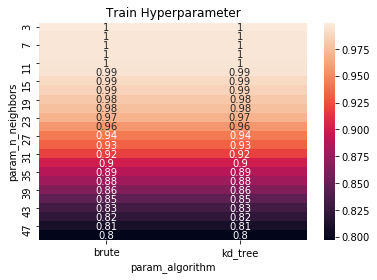

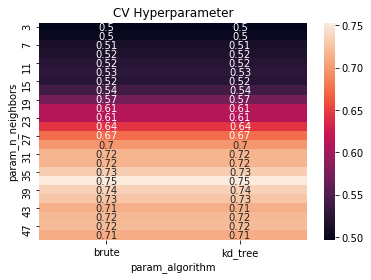

In [15]:
plt.title('Train Hyperparameter')
sns.heatmap(tr_pvt, annot=True)
plt.show()

plt.title('CV Hyperparameter')
sns.heatmap(cv_pvt, annot=True)
plt.show()

In [16]:
print(knn_clf.best_params_)
print('CV Score',knn_clf.score(cv_X,cv_y))

{'algorithm': 'kd_tree', 'n_neighbors': 37}
CV Score 0.6701388888888888


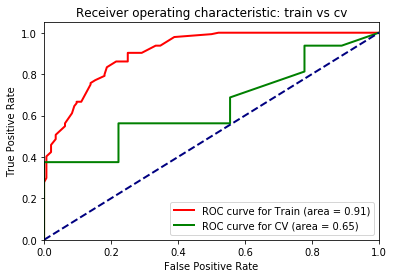

In [17]:
clf = CalibratedClassifierCV(knn_clf, cv=3)
clf.fit(tr_X,tr_y)

tr_pred = clf.predict_proba(tr_X)
cv_pred = clf.predict_proba(cv_X)

# Plot ROC cureve of train and cv data
plot_roc(tr_y, tr_pred, cv_y, cv_pred, 2)

# 6.1.1 Kaggle Score

In [18]:
# Create a submssion format to make submission in Kaggle
temp_id = df_test['id']
knn_csv = clf.predict_proba(ts_X)[:,1]
knn_df = pd.DataFrame(np.column_stack((temp_id,knn_csv)), columns=['id','target'])
knn_df['id'] = knn_df['id'].astype('int32')
knn_df.to_csv(data_dir+'/submission_knn.csv', index=False)

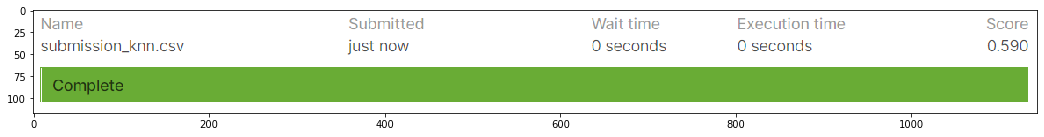

In [19]:
image = plt.imread(data_dir+'/submission_knn.png')
plt.figure(figsize=(18,5))
plt.imshow(image)

**Observation:** Knn perform kind of poorly. So, Knn will not work got this kind of problem

## 6.2 Logistic Regression

In [12]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [21]:
# LogisticRegression (See Docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

# List of hyperparameter that has to be tuned
params = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[10**i for i in range(-4,5)], 'solver':['liblinear','sag']}
# Instance of Logsitic Regression
log_model = LogisticRegression(random_state=42, class_weight='balanced')
# Call hyperparameter to get the best parameters of this model
log_clf = hyperparameter_model(log_model, params)

In [22]:
cv_pvt = pd.pivot_table(pd.DataFrame(log_clf.cv_results_), values='mean_test_score', index='param_penalty', \
                     columns='param_C')
tr_pvt = pd.pivot_table(pd.DataFrame(log_clf.cv_results_), values='mean_train_score', index='param_penalty', \
                     columns='param_C')

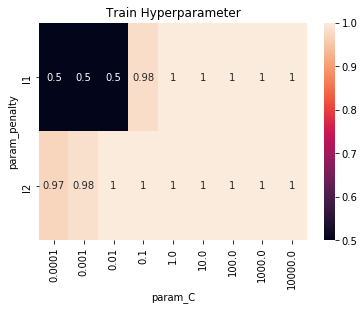

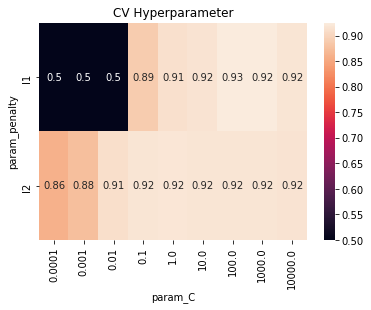

In [23]:
plt.title('Train Hyperparameter')
sns.heatmap(tr_pvt, annot=True)
plt.show()

plt.title('CV Hyperparameter')
sns.heatmap(cv_pvt, annot=True)
plt.show()

In [24]:
print(log_clf.best_params_)
print('cv Score',log_clf.score(cv_X,cv_y))

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
cv Score 0.625


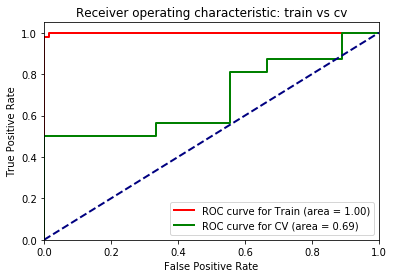

In [25]:
clf = CalibratedClassifierCV(log_clf, cv=3)
clf.fit(tr_X,tr_y)

tr_pred = clf.predict_proba(tr_X)
cv_pred = clf.predict_proba(cv_X)

# Plot ROC cureve of train and cv data
plot_roc(tr_y, tr_pred, cv_y, cv_pred, 2)

In [26]:
# Instance the model passing the best params we got
log_model = LogisticRegression(**log_clf.best_params_, random_state=42, class_weight='balanced')
log_model.fit(tr_X, tr_y)

LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

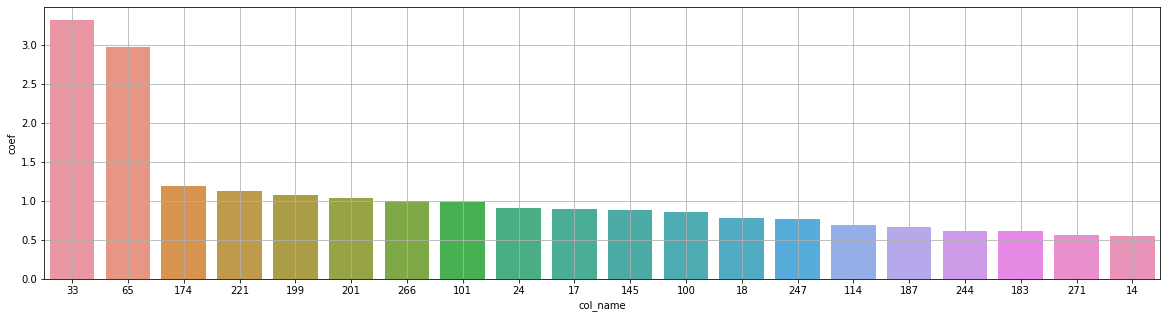

In [27]:
# Plot the feature importance on the basis of logistic Regression
df = plot_feature_importance(log_model, 'log_model', 20)

In [28]:
print('After applying Logistic regression\n')
position_featengg(df)

After applying Logistic regression

Position rank of mean : 282
Position rank of std : 109
Position rank of mean_sin : 75
Position rank of mean_cos : 80
Position rank of mean_tan : 72
Position rank of mean_sinh : 87
Position rank of mean_cosh : 106
Position rank of mean_tanh : 104
Position rank of mean_exp : 101
Position rank of mean_expm1 : 99
Position rank of mean_exp2 : 98
Position rank of mean_x2 : 94
Position rank of mean_x3 : 93
Position rank of mean_x4 : 235


## 6.2.1 Kaggle Score

In [29]:
# Create a submssion format to make submission in Kaggle
temp_id = df_test['id']
log_csv = clf.predict_proba(ts_X)[:,1]
log_df = pd.DataFrame(np.column_stack((temp_id,log_csv)), columns=['id','target'])
log_df['id'] = log_df['id'].astype('int32')
log_df.to_csv(data_dir+'/submission_log.csv', index=False)

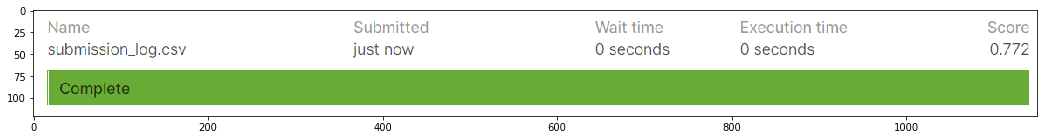

In [30]:
image = plt.imread(data_dir+'/submission_log.png')
plt.figure(figsize=(18,5))
plt.imshow(image)

## 6.3 SVC

In [13]:
# Import SVC
from sklearn.svm import SVC

In [32]:
# SVC (See Docs: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

# List of hyperparameter that has to be tuned
params = {'C':[10**i for i in range(-4,5)], 'kernel':['linear','poly','sigmoid','rbf']}
# Instance of SVC
svc_model = SVC(class_weight='balanced', random_state=42, probability=True)
# Call hyperparameter to find the best parameters
svc_clf = hyperparameter_model(svc_model, params)

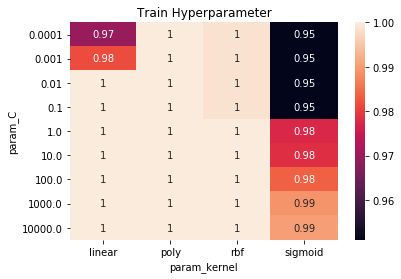

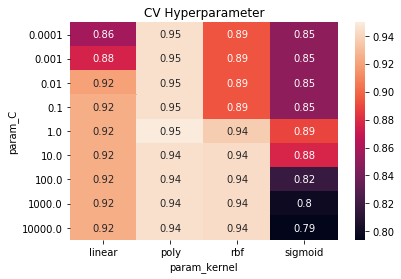

In [33]:
cv_pvt = pd.pivot_table(pd.DataFrame(svc_clf.cv_results_), values='mean_test_score', index='param_C', \
                     columns='param_kernel')
tr_pvt = pd.pivot_table(pd.DataFrame(svc_clf.cv_results_), values='mean_train_score', index='param_C', \
                     columns='param_kernel')

plt.title('Train Hyperparameter')
sns.heatmap(tr_pvt, annot=True)
plt.show()

plt.title('CV Hyperparameter')
sns.heatmap(cv_pvt, annot=True)
plt.show()

In [34]:
print(svc_clf.best_params_)
print('cv Score',svc_clf.score(cv_X,cv_y))

{'C': 1, 'kernel': 'poly'}
cv Score 0.7222222222222222


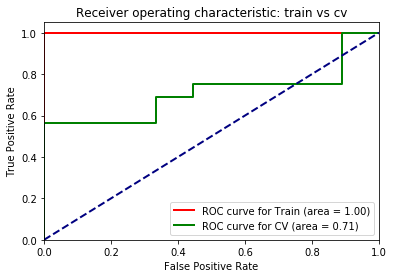

In [35]:
clf = CalibratedClassifierCV(svc_clf, cv=3)
clf.fit(tr_X,tr_y)

tr_pred = clf.predict_proba(tr_X)
cv_pred = clf.predict_proba(cv_X)

# Plot ROC curve of this model
plot_roc(tr_y, tr_pred, cv_y, cv_pred, 2)

## 6.3.1 Kaggle Score

In [36]:
# Create a submssion format to make submission in Kaggle
temp_id = df_test['id']
svc_csv = clf.predict_proba(ts_X)[:,1]
svc_df = pd.DataFrame(np.column_stack((temp_id,svc_csv)), columns=['id','target'])
svc_df['id'] = svc_df['id'].astype('int32')
svc_df.to_csv(data_dir+'/submission_svc.csv', index=False)

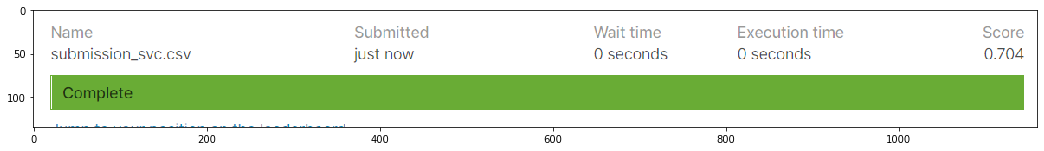

In [38]:
image = plt.imread(data_dir+'/submission_svc.png')
plt.figure(figsize=(18,5))
plt.imshow(image)

## 6.4 Random Forest

In [14]:
# Impoer Random Forest
from sklearn.ensemble import RandomForestClassifier

In [51]:
# RandomForest (See Docs: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

# List of hyperparameter that has t be tuned
params = {'n_estimators':[10,20,30,40,50,100,200,300,400],'max_depth':[2,3,5,7]}
# Instance of randomforest
rf_model = RandomForestClassifier(random_state=42)
# Perform GridSearchCV to find best parameters
rf_clf = hyperparameter_model(rf_model, params)

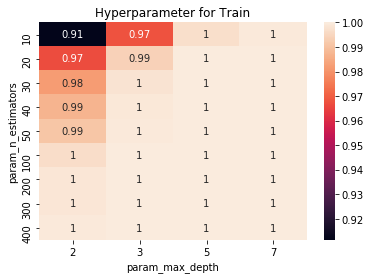

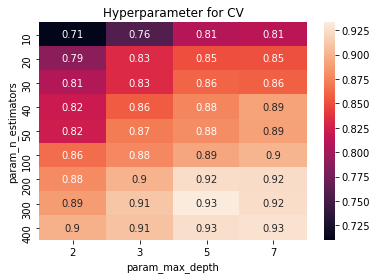

In [52]:
# Ref: https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

# Plotting of hyperpameter of train and cv score
pvt_tr = pd.pivot_table(pd.DataFrame(rf_clf.cv_results_), values='mean_train_score', index='param_n_estimators', columns='param_max_depth')
pvt_cv = pd.pivot_table(pd.DataFrame(rf_clf.cv_results_), values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
plt.figure(1)
plt.title('Hyperparameter for Train')
sns.heatmap(pvt_tr, annot=True)
plt.figure(2)
plt.title('Hyperparameter for CV')
sns.heatmap(pvt_cv, annot=True)
plt.show()

In [53]:
print(rf_clf.best_params_)

{'max_depth': 5, 'n_estimators': 300}


In [54]:
# Instance of randomforest with best parameters
rf_clf = RandomForestClassifier(**rf_clf.best_params_, random_state=42)
# Fit the model
rf_clf.fit(tr_X,tr_y)
# Calibrate the model
clf = CalibratedClassifierCV(rf_clf, cv=3)
clf.fit(tr_X, tr_y)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=5,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                  

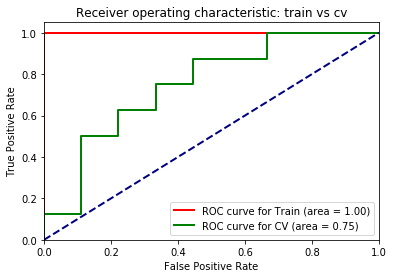

In [55]:
# Plot ROC Curve of train and cv
plot_roc(tr_y, clf.predict_proba(tr_X), cv_y, clf.predict_proba(cv_X), 2)

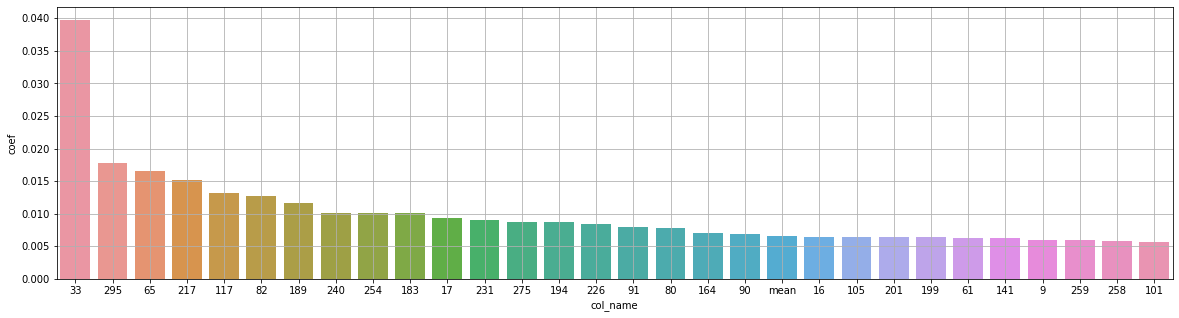

In [56]:
# Plot the feature importance based on this model
df = plot_feature_importance(rf_clf, 'rf',30)

In [57]:
print('After applying Random Forest\n')
position_featengg(df)

After applying Random Forest

Position rank of mean : 19
Position rank of std : 81
Position rank of mean_sin : 40
Position rank of mean_cos : 56
Position rank of mean_tan : 257
Position rank of mean_sinh : 52
Position rank of mean_cosh : 57
Position rank of mean_tanh : 181
Position rank of mean_exp : 208
Position rank of mean_expm1 : 217
Position rank of mean_exp2 : 73
Position rank of mean_x2 : 172
Position rank of mean_x3 : 108
Position rank of mean_x4 : 313


## 6.4.1 Kaggle Score

In [58]:
# Create a submission file format to submit in kaggle
temp_id = df_test['id']
rf_csv = clf.predict_proba(ts_X)[:,1]
rf_df = pd.DataFrame(np.column_stack((temp_id,rf_csv)), columns=['id','target'])
rf_df['id'] = rf_df['id'].astype('int32')
rf_df.to_csv(data_dir+'/submission_rf.csv', index=False)

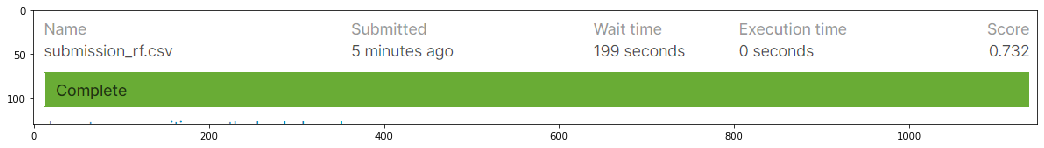

In [62]:
image = plt.imread(data_dir+'/submission_rf.png')
plt.figure(figsize=(18,5))
plt.imshow(image)

## 6.5 Xgboost

In [15]:
# Import Xgboost
from xgboost import XGBClassifier

In [22]:
# Xgboost (See Docs: https://xgboost.readthedocs.io/en/latest/python/python_api.html)

# List of hyperparameter that has to be tuned
params = {'max_depth':[2,3,5,7], 'n_estimators':[10,20,50,100,200,300,400]}
# Instance of XGBoost Model
xgb_model = XGBClassifier(scale_pos_weight=0.5)
# Call hyperparameter to find the best parameters
xgb_clf = hyperparameter_model(xgb_model, params)

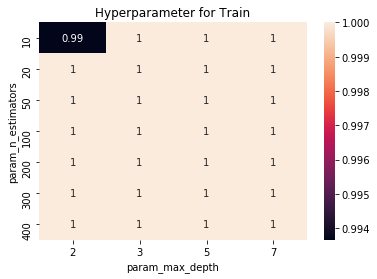

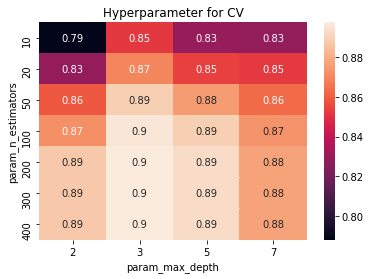

In [23]:
# Ref: https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

# Plotting of hyperpameter of train and cv score
pvt_tr = pd.pivot_table(pd.DataFrame(xgb_clf.cv_results_), values='mean_train_score', index='param_n_estimators', columns='param_max_depth')
pvt_cv = pd.pivot_table(pd.DataFrame(xgb_clf.cv_results_), values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
plt.figure(1)
plt.title('Hyperparameter for Train')
sns.heatmap(pvt_tr, annot=True)
plt.figure(2)
plt.title('Hyperparameter for CV')
sns.heatmap(pvt_cv, annot=True)
plt.show()

In [24]:
print(xgb_clf.best_params_)
print('cv Score',xgb_clf.score(cv_X,cv_y))

{'max_depth': 3, 'n_estimators': 200}
cv Score 0.8125


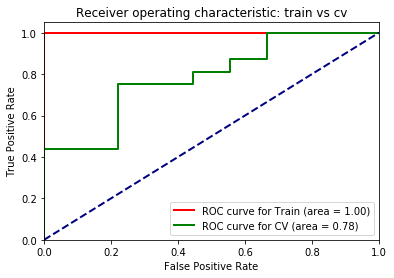

In [25]:
# Instance of randomforest with best parameters
xgb_clf = XGBClassifier(**xgb_clf.best_params_, random_state=42, scale_pos_weight=0.5)
# Fit the model
xgb_clf.fit(tr_X,tr_y)
# Calibrate the model
clf = CalibratedClassifierCV(xgb_clf, cv=3)
clf.fit(tr_X, tr_y)

tr_pred = clf.predict_proba(tr_X)
cv_pred = clf.predict_proba(cv_X)

# Plot ROC curve of train and cv
plot_roc(tr_y, tr_pred, cv_y, cv_pred, 2)

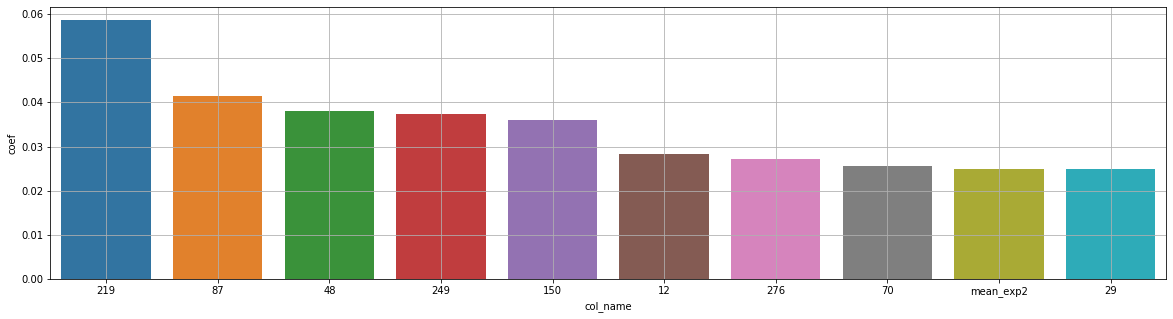

In [26]:
# Instance of XGBoost model with best parameters
df = plot_feature_importance(xgb_clf, 'xgb',10)

In [27]:
print('After applying Gradient Boosting Random Forest\n')
position_featengg(df)

After applying Gradient Boosting Random Forest

Position rank of mean : 67
Position rank of std : 160
Position rank of mean_sin : 161
Position rank of mean_cos : 162
Position rank of mean_tan : 29
Position rank of mean_sinh : 163
Position rank of mean_cosh : 164
Position rank of mean_tanh : 165
Position rank of mean_exp : 166
Position rank of mean_expm1 : 167
Position rank of mean_exp2 : 8
Position rank of mean_x2 : 168
Position rank of mean_x3 : 84
Position rank of mean_x4 : 313


## 6.5.1 Kaggle Score

In [28]:
# Create submission file format to submit in Kaggle
temp_id = df_test['id']
xgb_csv = clf.predict_proba(ts_X)[:,1]
xgb_df = pd.DataFrame(np.column_stack((temp_id,xgb_csv)), columns=['id','target'])
xgb_df['id'] = xgb_df['id'].astype('int32')
xgb_df.to_csv(data_dir+'/submission_xgb.csv', index=False)

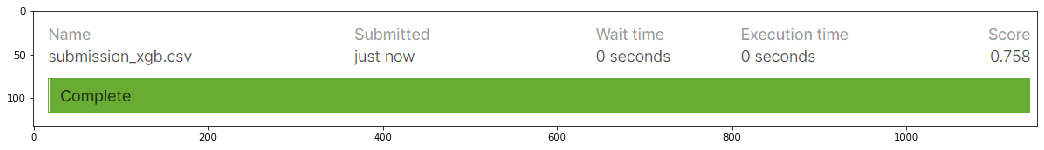

In [29]:
image = plt.imread(data_dir+'/submission_xgb.png')
plt.figure(figsize=(18,5))
plt.imshow(image)

## 6.6 Stacking Model

In [20]:
# Import Stacking Classifier
from mlxtend.classifier import StackingClassifier

In [21]:
# StackClassifier (See Docs: http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/#methods)

# Classifier 1: Logistic Regression with best params
clf1 = LogisticRegression(C = 100, penalty = 'l1', solver = 'liblinear', class_weight='balanced', random_state=42)
clf1.fit(tr_X,tr_y)
clf1 = CalibratedClassifierCV(clf1, cv=3)

# Classifier 2: SVC with best params
clf2 = SVC(C=1, kernel='poly', random_state=42, class_weight='balanced', probability=True)
clf2.fit(tr_X,tr_y)
clf2 = CalibratedClassifierCV(clf2, cv=3)

# Classifier 3: XGBoost with best params
clf3 = XGBClassifier(max_depth=3, n_estimators=200, scale_pos_weight=0.5)
clf3.fit(tr_X,tr_y)
clf3 = CalibratedClassifierCV(clf3, cv=3)

# Classifier 4: RF with best params
clf4 = RandomForestClassifier(max_depth=5, n_estimators=300)
clf4.fit(tr_X,tr_y)
clf4 = CalibratedClassifierCV(clf4, cv=3)

# Stack Classifier
sclf = StackingClassifier(classifiers=[clf1,clf2,clf3,clf4], meta_classifier=clf1, use_probas=True)

# Fit the model
sclf.fit(tr_X, tr_y)

# Predict in probabilities
tr_pred = sclf.predict_proba(tr_X)
cv_pred = sclf.predict_proba(cv_X)

In [20]:
# Score after stacking classifier
sclf.score(cv_X, cv_y)

0.64

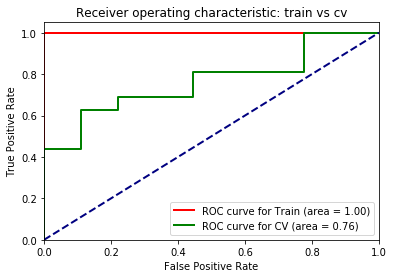

In [84]:
# Plot ROC Curve for train and cv
plot_roc(tr_y, tr_pred, cv_y, cv_pred,2)

## 6.6.1 Kaggle Score

In [85]:
# Create a submission file format to submit in Kaggle
temp_id = df_test['id']
sclf_csv = sclf.predict_proba(ts_X)[:,1]
sclf_df = pd.DataFrame(np.column_stack((temp_id,sclf_csv)), columns=['id','target'])
sclf_df['id'] = sclf_df['id'].astype('int32')
sclf_df.to_csv(data_dir+'/submission_sclf.csv', index=False)

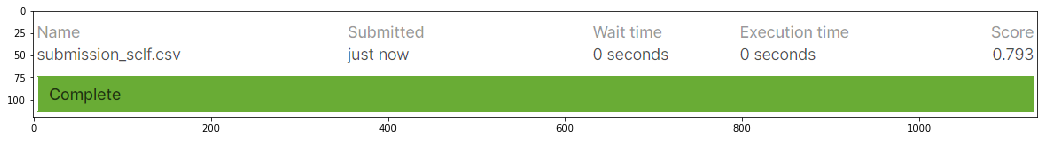

In [86]:
image = plt.imread(data_dir+'/submission_sclf.png')
plt.figure(figsize=(18,5))
plt.imshow(image)

# 6.7 Voting Classifier (Without Stack Classifier + no weights)

In [16]:
# Import Voting Classifier
from mlxtend.classifier import EnsembleVoteClassifier

In [22]:
# Voting Classifier (See Docs: http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2,clf3,clf4])
# Fit the train data
eclf.fit(tr_X,tr_y)

EnsembleVoteClassifier(clfs=[CalibratedClassifierCV(base_estimator=LogisticRegression(C=100,
                                                                                      class_weight='balanced',
                                                                                      dual=False,
                                                                                      fit_intercept=True,
                                                                                      intercept_scaling=1,
                                                                                      l1_ratio=None,
                                                                                      max_iter=100,
                                                                                      multi_class='auto',
                                                                                      n_jobs=None,
                                                                               

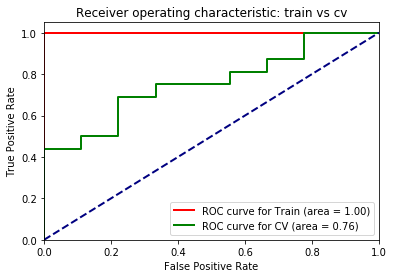

In [23]:
# Predict in probabilities
tr_pred = eclf.predict_proba(tr_X)
cv_pred = eclf.predict_proba(cv_X)
# Plot ROC Curve for train and cv
plot_roc(tr_y, tr_pred, cv_y, cv_pred,2)

# 6.7.1 Kaggle Score

In [23]:
# Create a submission file format to submit in Kaggle
temp_id = df_test['id']
eclf_csv = eclf.predict_proba(ts_X)[:,1]
eclf_df = pd.DataFrame(np.column_stack((temp_id,eclf_csv)), columns=['id','target'])
eclf_df['id'] = eclf_df['id'].astype('int32')
eclf_df.to_csv(data_dir+'/submission_eclf.csv', index=False)

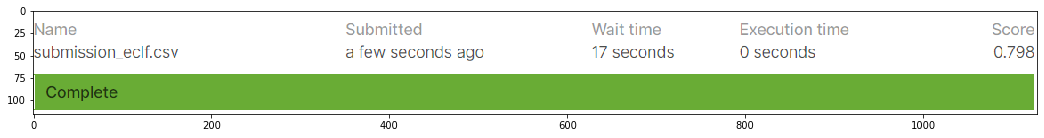

In [24]:
image = plt.imread(data_dir+'/submission_eclf.png')
plt.figure(figsize=(18,5))
plt.imshow(image)

# 6.8 Voting Classifier (With Stack Classifier + no weights)

In [24]:
# Voting Classifier (See Docs: http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2,clf3,clf4,sclf])
# Fit the train data
eclf.fit(tr_X,tr_y)

EnsembleVoteClassifier(clfs=[CalibratedClassifierCV(base_estimator=LogisticRegression(C=100,
                                                                                      class_weight='balanced',
                                                                                      dual=False,
                                                                                      fit_intercept=True,
                                                                                      intercept_scaling=1,
                                                                                      l1_ratio=None,
                                                                                      max_iter=100,
                                                                                      multi_class='auto',
                                                                                      n_jobs=None,
                                                                               

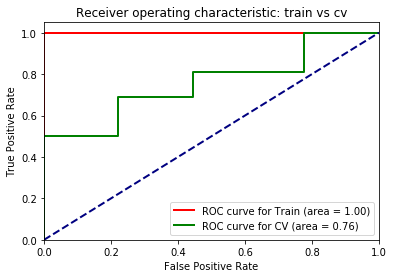

In [25]:
# Predict in probabilities
tr_pred = eclf.predict_proba(tr_X)
cv_pred = eclf.predict_proba(cv_X)
# Plot ROC Curve for train and cv
plot_roc(tr_y, tr_pred, cv_y, cv_pred,2)

# 6.8.1 Kaggle Score

In [26]:
# Create a submission file format to submit in Kaggle
temp_id = df_test['id']
eclf_csv = eclf.predict_proba(ts_X)[:,1]
eclf_df = pd.DataFrame(np.column_stack((temp_id,eclf_csv)), columns=['id','target'])
eclf_df['id'] = eclf_df['id'].astype('int32')
eclf_df.to_csv(data_dir+'/submission_eclf_stack.csv', index=False)

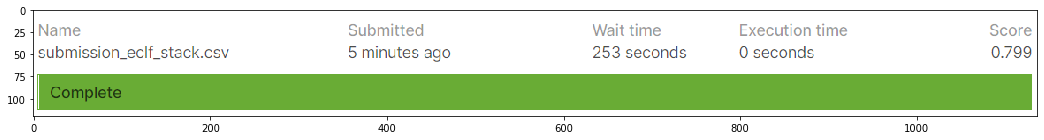

In [27]:
image = plt.imread(data_dir+'/submission_eclf_stack.png')
plt.figure(figsize=(18,5))
plt.imshow(image)

# 6.9 Voting Classifier (without Stack Classifier + weights)

In [26]:
# Voting Classifier (See Docs: http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/)
eclf = EnsembleVoteClassifier(clfs=[clf1,clf2,clf3,clf4], weights=[0.3,0.2,0.2,0.3])
# Fit the train data
eclf.fit(tr_X,tr_y)

EnsembleVoteClassifier(clfs=[CalibratedClassifierCV(base_estimator=LogisticRegression(C=100,
                                                                                      class_weight='balanced',
                                                                                      dual=False,
                                                                                      fit_intercept=True,
                                                                                      intercept_scaling=1,
                                                                                      l1_ratio=None,
                                                                                      max_iter=100,
                                                                                      multi_class='auto',
                                                                                      n_jobs=None,
                                                                               

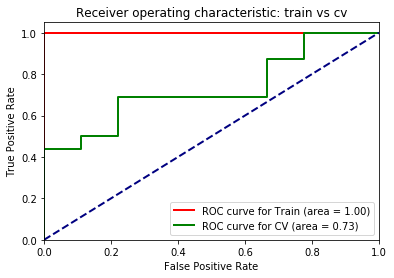

In [27]:
# Predict in probabilities
tr_pred = eclf.predict_proba(tr_X)
cv_pred = eclf.predict_proba(cv_X)
# Plot ROC Curve for train and cv
plot_roc(tr_y, tr_pred, cv_y, cv_pred,2)

# 6.9.1 Kaggle Score

In [29]:
# Create a submission file format to submit in Kaggle
temp_id = df_test['id']
eclf_csv = eclf.predict_proba(ts_X)[:,1]
eclf_df = pd.DataFrame(np.column_stack((temp_id,eclf_csv)), columns=['id','target'])
eclf_df['id'] = eclf_df['id'].astype('int32')
eclf_df.to_csv(data_dir+'/submission_eclf_weights.csv', index=False)

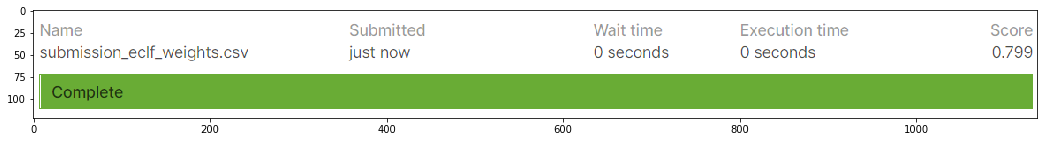

In [30]:
image = plt.imread(data_dir+'/submission_eclf_weights.png')
plt.figure(figsize=(18,5))
plt.imshow(image)

# 6.10 Voting Classifier (with Stack Classifier + weights)

In [28]:
# Voting Classifier (See Docs: http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/)
eclf = EnsembleVoteClassifier(clfs=[clf1,clf2,clf3,clf4,sclf], weights=[0.3,0.1,0.15,0.15,0.3])
# Fit the train data
eclf.fit(tr_X,tr_y)

EnsembleVoteClassifier(clfs=[CalibratedClassifierCV(base_estimator=LogisticRegression(C=100,
                                                                                      class_weight='balanced',
                                                                                      dual=False,
                                                                                      fit_intercept=True,
                                                                                      intercept_scaling=1,
                                                                                      l1_ratio=None,
                                                                                      max_iter=100,
                                                                                      multi_class='auto',
                                                                                      n_jobs=None,
                                                                               

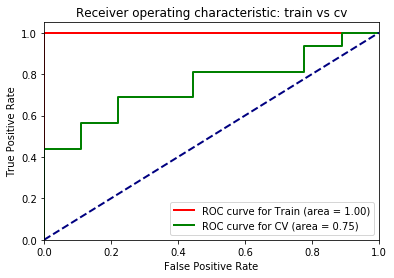

In [29]:
# Predict in probabilities
tr_pred = eclf.predict_proba(tr_X)
cv_pred = eclf.predict_proba(cv_X)
# Plot ROC Curve for train and cv
plot_roc(tr_y, tr_pred, cv_y, cv_pred,2)

# 6.10.1 Kaggle Score

In [32]:
# Create a submission file format to submit in Kaggle
temp_id = df_test['id']
eclf_csv = eclf.predict_proba(ts_X)[:,1]
eclf_df = pd.DataFrame(np.column_stack((temp_id,eclf_csv)), columns=['id','target'])
eclf_df['id'] = eclf_df['id'].astype('int32')
eclf_df.to_csv(data_dir+'/submission_eclf_stack_weights.csv', index=False)

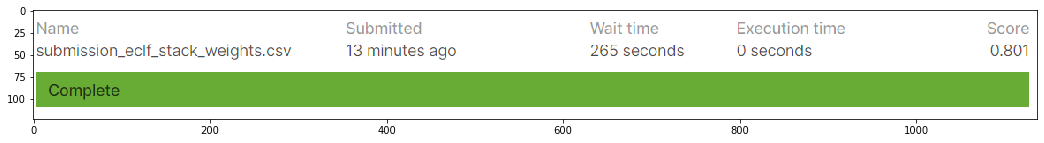

In [33]:
image = plt.imread(data_dir+'/submission_eclf_stack_weights.png')
plt.figure(figsize=(18,5))
plt.imshow(image)

# 7. Summary of All Models

In [30]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['Model','Hyerparameter','cv','test']
x.add_row(['kNN',r"{'algorithm': 'kd_tree', 'n_neighbors': 37}",0.65,0.590])
x.add_row(['Logistic Regression',r"{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}",0.69,0.772])
x.add_row(['SVC',r"{'C': 1, 'kernel': 'poly'}",0.71,0.704])
x.add_row(['RandomForest',r"{'max_depth': 5, 'n_estimators': 300}",0.75,0.732])
x.add_row(['XGBoost',r"{'max_depth': 3, 'n_estimators': 200}",0.78,0.758])
x.add_row(['StackClassifier','-',0.76,0.793])
x.add_row(['Voting Classifier(No stacking + no weights)','-',0.76,0.798])
x.add_row(['Voting Classifier(stacking + no weights)','-',0.76,0.799])
x.add_row(['Voting Classifier(no stacking + weights)','-',0.73,0.799])
x.add_row(['Voting Classifier(stacking + weights)','-',0.75,0.801])
print(x)

+---------------------------------------------+----------------------------------------------------+------+-------+
|                    Model                    |                   Hyerparameter                    |  cv  |  test |
+---------------------------------------------+----------------------------------------------------+------+-------+
|                     kNN                     |    {'algorithm': 'kd_tree', 'n_neighbors': 37}     | 0.65 |  0.59 |
|             Logistic Regression             | {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'} | 0.69 | 0.772 |
|                     SVC                     |             {'C': 1, 'kernel': 'poly'}             | 0.71 | 0.704 |
|                 RandomForest                |       {'max_depth': 5, 'n_estimators': 300}        | 0.75 | 0.732 |
|                   XGBoost                   |       {'max_depth': 3, 'n_estimators': 200}        | 0.78 | 0.758 |
|               StackClassifier               |                         